In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Path to your CSV output file
file_path = "bel_similarity_output.csv"

df = pd.read_csv(file_path)
df.head()

,index,evidence,llm_statement,indra_statement,match_index,semantic_score,semantic_rating,similarity_score,similarity_rating,match_type,similarity_rating_reason
0,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,0,2.0,partial,0.0,low,not_similar,The candidate shares the same entities but dif...
1,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,1,4.0,good,4.0,good,most_similar,The candidate matches both the entities and th...
2,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2,2.0,partial,0.0,low,not_similar,The candidate shares the same entities but dif...
3,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,3,2.0,partial,0.0,low,not_similar,The candidate shares the same entities but dif...
4,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,4,0.0,low,0.0,low,not_similar,The candidate involves a different AKT isoform...


In [3]:
print("Columns:", df.columns.tolist())

Columns: ['index', 'evidence', 'llm_statement', 'indra_statement', 'match_index', 'semantic_score', 'semantic_rating', 'similarity_score', 'similarity_rating', 'match_type', 'similarity_rating_reason']


In [4]:
rating_counts = df["similarity_rating"].value_counts().rename_axis("rating").reset_index(name="count")
rating_counts["percentage"] = (rating_counts["count"] / len(df) * 100).round(2)
rating_counts

,rating,count,percentage
0,low,78,71.56
1,partial,16,14.68
2,good,14,12.84
3,none_comparable,1,0.92


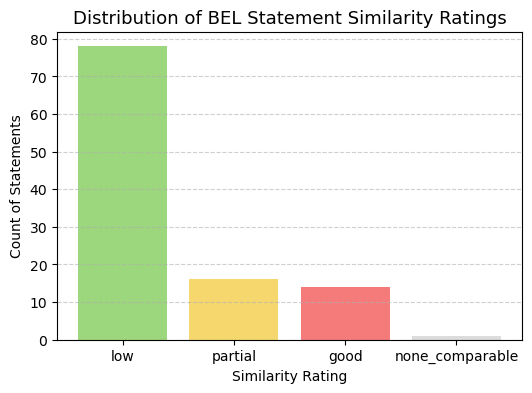

In [5]:
plt.figure(figsize=(6,4))
plt.bar(rating_counts["rating"], rating_counts["count"], color=["#9cd67d", "#f5d76e", "#f57b7b", "#dcdcdc"])
plt.title("Distribution of BEL Statement Similarity Ratings", fontsize=13)
plt.ylabel("Count of Statements")
plt.xlabel("Similarity Rating")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [6]:
# --- Per-evidence breakdown (with original evidence index) ---
evidence_summary = (
    df.groupby(["index", "evidence", "similarity_rating"])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)

# Clean up any residual column names
evidence_summary.columns.name = None

# Compute totals and comparable percentages
evidence_summary["total_comparisons"] = evidence_summary.select_dtypes("number").sum(axis=1)
evidence_summary["comparable_count"] = (
    evidence_summary.get("good", 0)
    + evidence_summary.get("partial", 0)
    + evidence_summary.get("low", 0)
)
evidence_summary["comparable_pct"] = (
    evidence_summary["comparable_count"] / evidence_summary["total_comparisons"] * 100
).round(1)

display(evidence_summary)


,index,evidence,good,low,none_comparable,partial,total_comparisons,comparable_count,comparable_pct
0,3,AKT2 also phosphorylated S326 of HSF1 but show...,1,3,0,1,8,5,62.5
1,3,Mass spectrometry showed that AKT1 also phosph...,3,9,0,3,18,15,83.3
2,3,"Phosphorylation at S326 is mediated by AKT1, m...",1,4,0,0,8,5,62.5
3,3,"Similarly, mTOR, p38, MEK1 and DYRK2 all phosp...",0,15,0,0,18,15,83.3
4,4,AKT2 promoted a significant increase in HSF1 a...,1,1,0,0,6,2,33.3
5,4,Both AKT1 and AKT2 phosphorylated S326 of HSF1...,2,1,0,1,8,4,50.0
6,4,"Consistent with our previous findings, AKT1 st...",1,0,0,1,6,2,33.3
7,4,We previously identified AKT1 as an upstream r...,1,0,0,1,6,2,33.3
8,5,AKT1 is also a well-known activator of mTOR an...,0,1,1,0,7,1,14.3
9,5,These results seem contradictory because AKT2 ...,0,1,0,1,7,2,28.6


In [7]:
for _, row in rating_counts.iterrows():
    print(f"{row['rating']}: {row['count']} statements ({row['percentage']}%)")

low: 78 statements (71.56%)
partial: 16 statements (14.68%)
good: 14 statements (12.84%)
none_comparable: 1 statements (0.92%)


In [8]:
rating_to_inspect = "good"  # change to "partial", "none_comparable", etc.
examples = df[df["similarity_rating"] == rating_to_inspect][["evidence", "llm_statement", "indra_statement", "similarity_rating_reason"]]
examples

,evidence,llm_statement,indra_statement,similarity_rating_reason
1,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate matches both the entities and th...
9,AKT2 also phosphorylated S326 of HSF1 but show...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,Same AKT isoform and phosphorylation site; bot...
27,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Both the entities and the phosphorylation site...
33,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate matches the query exactly in ter...
35,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate matches the query in terms of en...
41,We previously identified AKT1 as an upstream r...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate matches the query exactly in ter...
43,"Consistent with our previous findings, AKT1 st...",act(p(HGNC:AKT1)) directlyIncreases act(p(HGNC...,p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate matches the query in both entiti...
44,AKT2 promoted a significant increase in HSF1 a...,act(p(HGNC:AKT2)) increases act(p(HGNC:HSF1)),p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,Both statements involve AKT2 increasing the ac...
47,Both AKT1 and AKT2 phosphorylated S326 of HSF1...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate matches the query exactly in ter...
48,Both AKT1 and AKT2 phosphorylated S326 of HSF1...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,The candidate uses different identifiers but r...


In [9]:
rating_to_inspect = "partial"  # change to "partial", "none_comparable", etc.
examples = df[df["similarity_rating"] == rating_to_inspect][["evidence", "llm_statement", "indra_statement", "similarity_rating_reason"]]
examples

,evidence,llm_statement,indra_statement,similarity_rating_reason
6,AKT2 also phosphorylated S326 of HSF1 but show...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Different AKT isoform but same phosphorylation...
36,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate involves the same entities but d...
37,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate involves the same entities but d...
38,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate involves the same entities but d...
40,We previously identified AKT1 as an upstream r...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,"The candidate involves AKT2 instead of AKT1, b..."
42,"Consistent with our previous findings, AKT1 st...",act(p(HGNC:AKT1)) directlyIncreases act(p(HGNC...,p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,"The candidate involves AKT2 instead of AKT1, b..."
46,Both AKT1 and AKT2 phosphorylated S326 of HSF1...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,"The candidate involves AKT2 instead of AKT1, b..."
50,These results seem contradictory because AKT2 ...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) increases p(HGNC:5224 ! HSF1),The candidate involves the same proteins AKT2 ...
67,To confirm whether DNA binding of HSF1 resulte...,p(HGNC:AKT1) increases r(HGNC:HSPA1A),p(HGNC:392 ! AKT2) increases p(FPLX:HSPA ! HSPA),"Different AKT isoform but same HSP family, par..."
71,To confirm whether DNA binding of HSF1 resulte...,p(HGNC:AKT1) increases r(HGNC:HSPA1A),p(HGNC:393 ! AKT3) increases p(FPLX:HSPA ! HSPA),"Different AKT isoform but same HSP family, par..."


In [10]:
rating_to_inspect = "low"  # change to "partial", "none_comparable", etc.
examples = df[df["similarity_rating"] == rating_to_inspect][["evidence", "llm_statement", "indra_statement", "similarity_rating_reason"]]
examples

,evidence,llm_statement,indra_statement,similarity_rating_reason
0,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate shares the same entities but dif...
2,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate shares the same entities but dif...
3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate shares the same entities but dif...
4,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,The candidate involves a different AKT isoform...
5,AKT2 also phosphorylated S326 of HSF1 but show...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Different AKT isoform and phosphorylation site...
...,...,...,...,...
102,We found that SLAMF1 controls trafficking of t...,p(HGNC:SLAMF1) directlyIncreases p(HGNC:TICAM2),p(HGNC:10903 ! SLAMF1) partOf complex(p(HGNC:1...,Different relationship and entities; no direct...
103,We found that SLAMF1 controls trafficking of t...,p(HGNC:SLAMF1) directlyIncreases p(HGNC:TICAM2),p(HGNC:20568 ! TRAM1) partOf complex(p(HGNC:10...,Different relationship and entities; no direct...
104,We found that endogenous SLAMF1 protein intera...,"complex(p(HGNC:SLAMF1), p(HGNC:TICAM2))",p(HGNC:11850 ! TLR4) increases p(HGNC:5434 ! I...,"The candidate involves TLR4 and IFNB1, which a..."
105,We found that endogenous SLAMF1 protein intera...,"complex(p(HGNC:SLAMF1), p(HGNC:TICAM2))",p(HGNC:11850 ! TLR4) increases p(HGNC:11850 ! ...,The candidate describes a self-increasing inte...


In [11]:
# Replace None/NaN with a label for clarity
df["semantic_score"] = df["semantic_score"].fillna("none")
df["similarity_score"] = df["similarity_score"].fillna("none")

# --- Count occurrences of each score ---
semantic_counts = df["semantic_score"].value_counts()
similarity_counts = df["similarity_score"].value_counts()

# Ensure consistent order (0, 2, 4, none)
score_order = [0, 2, 4, "none"]

semantic_counts = semantic_counts.reindex(score_order, fill_value=0)
similarity_counts = similarity_counts.reindex(score_order, fill_value=0)

print("\nSemantic Score Distribution:")
print(semantic_counts)

print("\nSimilarity Score Distribution:")
print(similarity_counts)


Semantic Score Distribution:
semantic_score
0       66
2       29
4       13
none     1
Name: count, dtype: int64

Similarity Score Distribution:
similarity_score
0       78
2       16
4       14
none     1
Name: count, dtype: int64


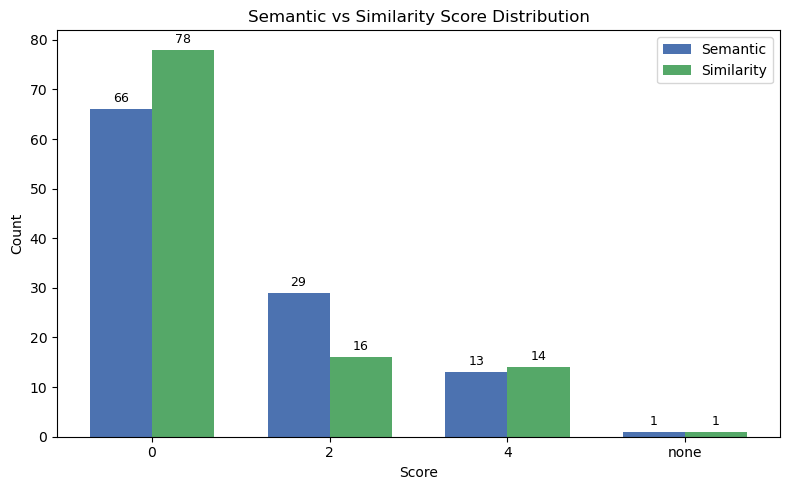

=== Score Summary ===
Semantic: 11.9% good, 26.6% partial, 60.6% low
Similarity: 12.8% good, 14.7% partial, 71.6% low


In [12]:
# --- Define the order and ensure values are aligned ---
score_order = [0, 2, 4, "none"]
semantic_counts = semantic_counts.reindex(score_order, fill_value=0)
similarity_counts = similarity_counts.reindex(score_order, fill_value=0)

# --- Compute percentages ---
total_semantic = semantic_counts.sum()
total_similarity = similarity_counts.sum()

semantic_percent_good = (semantic_counts[4] / total_semantic * 100) if total_semantic > 0 else 0
similarity_percent_good = (similarity_counts[4] / total_similarity * 100) if total_similarity > 0 else 0

semantic_percent_partial = (semantic_counts[2] / total_semantic * 100) if total_semantic > 0 else 0
similarity_percent_partial = (similarity_counts[2] / total_similarity * 100) if total_similarity > 0 else 0

semantic_percent_low = (semantic_counts[0] / total_semantic * 100) if total_semantic > 0 else 0
similarity_percent_low = (similarity_counts[0] / total_similarity * 100) if total_similarity > 0 else 0

# --- Create the bar plot ---
x = np.arange(len(score_order))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, semantic_counts.values, width, label="Semantic", color="#4c72b0")
bars2 = ax.bar(x + width/2, similarity_counts.values, width, label="Similarity", color="#55a868")

# --- Labels, title, and legend ---
ax.set_xlabel("Score")
ax.set_ylabel("Count")
ax.set_title("Semantic vs Similarity Score Distribution")
ax.set_xticks(x)
ax.set_xticklabels(score_order)
ax.legend()

# --- Value labels on top of bars ---
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{int(height)}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# --- Summary percentages ---
print("=== Score Summary ===")
print(f"Semantic: {semantic_percent_good:.1f}% good, {semantic_percent_partial:.1f}% partial, {semantic_percent_low:.1f}% low")
print(f"Similarity: {similarity_percent_good:.1f}% good, {similarity_percent_partial:.1f}% partial, {similarity_percent_low:.1f}% low")


In [13]:
# Filter rows where semantic=2 but similarity=0
semantic2_similarity0 = df[
    (df["semantic_score"] == 2) & (df["similarity_score"] == 0)
]

print(f"Number of cases where Semantic=2 but Similarity=0: {len(semantic2_similarity0)}")
semantic2_similarity0[[
    "index",
    "evidence",
    "llm_statement",
    "indra_statement",
    "semantic_score",
    "similarity_score",
    "semantic_rating",
    "similarity_rating",
    "similarity_rating_reason",
    "match_type"
]]

Number of cases where Semantic=2 but Similarity=0: 15


,index,evidence,llm_statement,indra_statement,semantic_score,similarity_score,semantic_rating,similarity_rating,similarity_rating_reason,match_type
0,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,The candidate shares the same entities but dif...,not_similar
2,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,The candidate shares the same entities but dif...,not_similar
3,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,The candidate shares the same entities but dif...,not_similar
25,3,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,"The entities and relationship are similar, but...",not_similar
26,3,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,"The entities and relationship are similar, but...",not_similar
28,3,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,"The entities and relationship are similar, but...",not_similar
30,3,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,The candidate involves AKT1 and HSF1 but modif...,not_similar
31,3,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,The candidate involves AKT1 and HSF1 but modif...,not_similar
32,3,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,2.0,0.0,partial,low,The candidate involves AKT1 and HSF1 but modif...,not_similar
56,6,Introduction of AKT1 was observed to promote a...,p(HGNC:AKT1) increases complex(p(HGNC:HSF1)),p(HGNC:391 ! AKT1) increases p(FPLX:HSP90 ! HS...,2.0,0.0,partial,low,Same AKT isoform but different target protein;...,not_similar
